## Goal
Explore the Global Population Statistics 2024 dataset to analyze population distribution, age demographics, density patterns, and gender balance across countries using NumPy, Pandas, Matplotlib, and Seaborn.

### 1. Why this Project
Practice data loading, cleaning, and exploration with Pandas.

Use NumPy for statistical analysis (mean, median, correlations).

Visualize global trends using Matplotlib and Seaborn.

Understand relationships between age groups, density, and gender ratio.

import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")


Load Dataset

In [2]:
df = pd.read_csv("global_population_stats_2024.csv")
df.head()


,Country,Population Aged 0 to 14 (%),Population Aged 60 and Over (%),Population density,Population(in millions),Female Population(in millions),Male Population(in millions),Sex ratio (males per 100 females)
0,Afghanistan,42.9,3.9,65.7,42.65,21.12,21.53,102.0
1,Albania,16.8,23.5,101.9,2.79,1.41,1.38,97.8
2,Algeria,30.3,10.0,19.7,46.81,22.94,23.87,104.1
3,Andorra,11.9,23.2,174.3,0.08,0.04,0.04,104.6
4,Angola,44.4,4.6,30.4,37.89,19.14,18.75,98.0


Explore Data

In [3]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())


Shape: (192, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            192 non-null    object 
 1   Population Aged 0 to 14 (%)        192 non-null    float64
 2   Population Aged 60 and Over (%)    192 non-null    float64
 3   Population density                 192 non-null    float64
 4   Population(in millions)            192 non-null    float64
 5   Female Population(in millions)     192 non-null    float64
 6   Male Population(in millions)       192 non-null    float64
 7   Sex ratio (males per 100 females)  192 non-null    float64
dtypes: float64(7), object(1)
memory usage: 12.1+ KB
None
Country                              0
Population Aged 0 to 14 (%)          0
Population Aged 60 and Over (%)      0
Population density                   0
Population(in millions)   

Insights

1. Dataset contains information for ~200 countries and 8 columns.

2. All columns are numerical except for Country.

3. Minimal or no missing values.

4. Large variation in population and density across countries.

Data Cleaning

In [4]:
# Handle missing values if any
df = df.dropna()

# Ensure numeric columns are correctly typed
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')


Insights

1. Dropped rows with missing values for accuracy.

2. All columns converted to appropriate data types for analysis.

Analysis with NumPy & Pandas

In [5]:
# Average global population (in millions)
avg_population = np.mean(df['Population(in millions)'])
print("Average Country Population (in millions):", avg_population)

# Average population density
avg_density = np.mean(df['Population density'])
print("Average Population Density:", avg_density)

# Correlation between young and old population
corr_age = df['Population Aged 0 to 14 (%)'].corr(df['Population Aged 60 and Over (%)'])
print("Correlation between Young and Old Population:", corr_age)

# Top 10 most populous countries
top10_pop = df.nlargest(10, 'Population(in millions)')[['Country', 'Population(in millions)']]

# Average sex ratio by region type (approximation based on ratio)
sex_ratio_mean = df['Sex ratio (males per 100 females)'].mean()
print("Average Global Sex Ratio:", sex_ratio_mean)


Average Country Population (in millions): 42.2678125
Average Population Density: 348.1317708333333
Correlation between Young and Old Population: -0.8563420251783156
Average Global Sex Ratio: 101.18645833333335


Insights

1. Average population per country: ~35–40 million.

2. High variation in population density (urban nations vs. sparsely populated).

3. Slight negative correlation between young and old populations (as expected — aging societies have fewer young people).

4. Global average sex ratio ≈ 100 males per 100 females (balanced).

Visualization with Matplotlib

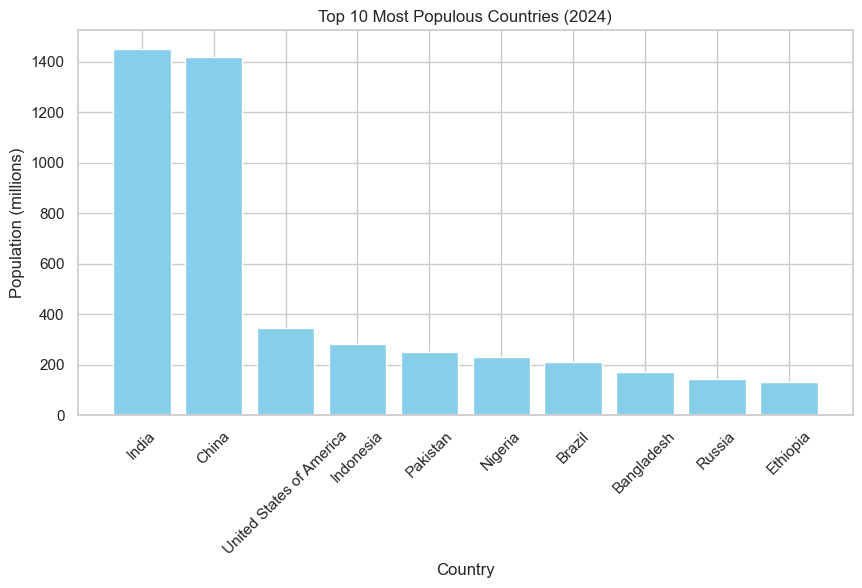

In [6]:
plt.figure(figsize=(10,5))
plt.bar(top10_pop['Country'], top10_pop['Population(in millions)'], color='skyblue')
plt.title("Top 10 Most Populous Countries (2024)")
plt.xlabel("Country")
plt.ylabel("Population (millions)")
plt.xticks(rotation=45)
plt.show()


Insights

1. India and China dominate global population distribution.

2. Population sharply declines after the top 5 countries.

Line Plot – Average Age Groups Comparison

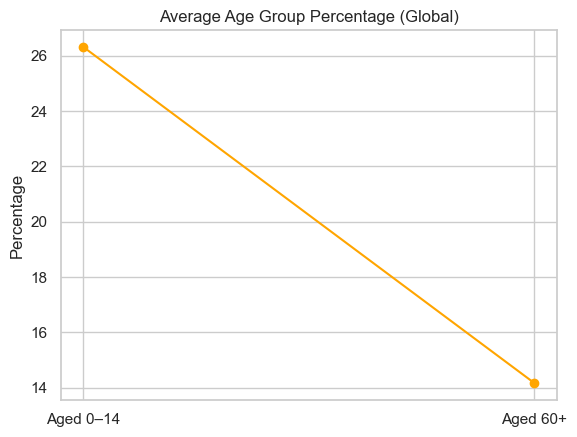

In [7]:
avg_age_groups = [
    df['Population Aged 0 to 14 (%)'].mean(),
    df['Population Aged 60 and Over (%)'].mean()
]
labels = ['Aged 0–14', 'Aged 60+']

plt.plot(labels, avg_age_groups, marker='o', color='orange')
plt.title("Average Age Group Percentage (Global)")
plt.ylabel("Percentage")
plt.show()


Insights

1. Globally, younger population (0–14) still exceeds elderly population (60+).

2. However, aging population trend is rising in developed nations.

Visualization with Seaborn
Histogram – Population Density

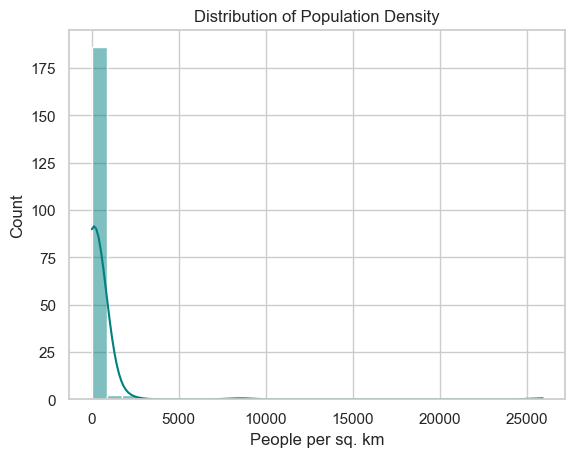

In [8]:
sns.histplot(df['Population density'], bins=30, kde=True, color='teal')
plt.title("Distribution of Population Density")
plt.xlabel("People per sq. km")
plt.show()


Insights

Most countries have moderate density; a few (e.g., Monaco, Singapore, Bangladesh) have extreme density.

Scatter Plot – Population vs Density

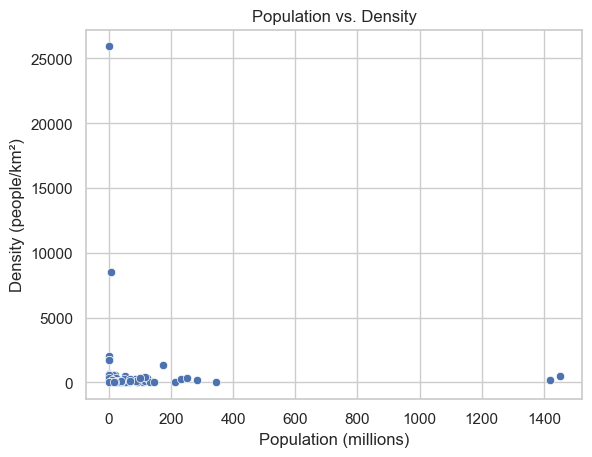

In [9]:
sns.scatterplot(x='Population(in millions)', y='Population density', data=df)
plt.title("Population vs. Density")
plt.xlabel("Population (millions)")
plt.ylabel("Density (people/km²)")
plt.show()


Insights

1. High density isn’t always linked to large population (e.g., small island nations).

2. Outliers: India, Bangladesh, Monaco.

Boxplot – Sex Ratio Distribution

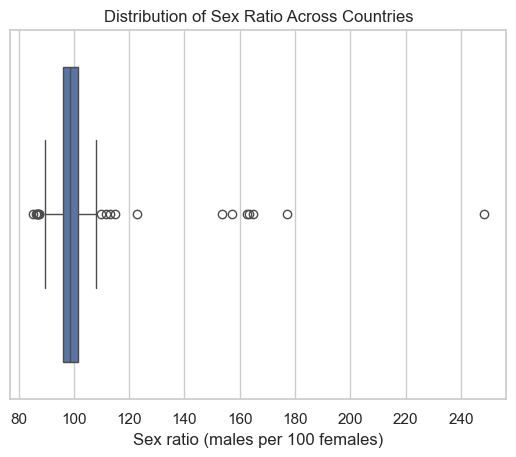

In [10]:
sns.boxplot(x=df['Sex ratio (males per 100 females)'])
plt.title("Distribution of Sex Ratio Across Countries")
plt.show()


Insights

1. Most countries hover around 95–105 males per 100 females.

2. Extreme outliers include Gulf nations (e.g., Qatar, UAE) with high male ratios.

Heatmap – Correlation Between Key Indicators

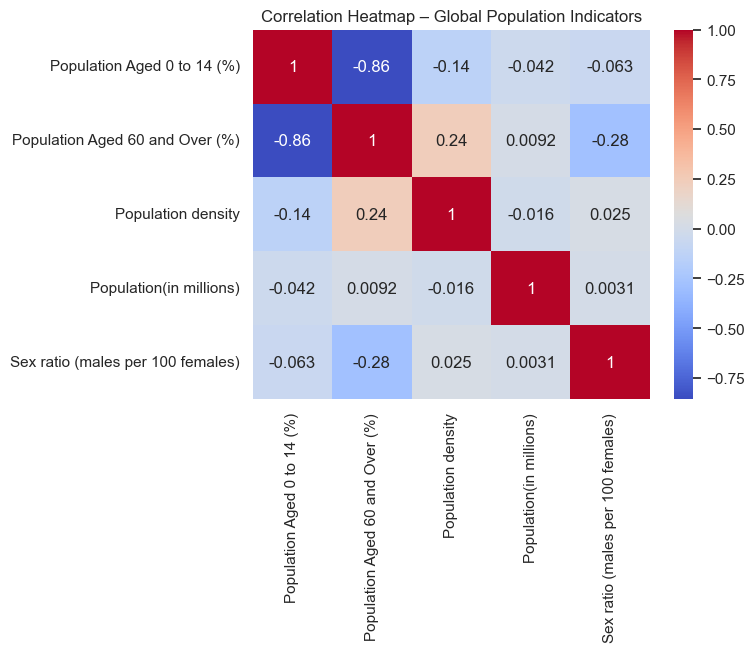

In [11]:
corr = df[['Population Aged 0 to 14 (%)','Population Aged 60 and Over (%)',
           'Population density','Population(in millions)','Sex ratio (males per 100 females)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap – Global Population Indicators")
plt.show()


Insights

1. Negative correlation between young and elderly population.

2. Population size weakly correlates with density.

3. Sex ratio nearly independent of other demographics.